In [39]:
from hossam import load_data
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler

In [40]:
origin = load_data('nursing_grades')
origin

[data] https://data.hossam.kr/data/lab05/nursing_grades.xlsx
[desc] 어느 간호학과 대학원에 지원한 학생들에 대한 합격/불합격 여부를 조사한 가상의 데이터(메타데이터 없음)
[!] Cannot read metadata


,이름,성별,필기점수,학부성적,병원경력,합격여부
접수코드,,,,,,
NRS0001,장은우,남,380,3.61,3,불합격
NRS0002,최지호,남,660,3.67,3,합격
NRS0003,김하준,남,800,4.00,1,합격
NRS0004,임아윤,여,640,3.19,4,합격
NRS0005,강하준,남,520,2.93,4,불합격
...,...,...,...,...,...,...
NRS0396,박지유,여,620,4.00,2,불합격
NRS0397,조하은,여,560,3.04,3,불합격
NRS0398,박하윤,여,460,2.63,2,불합격


Min-Max Scaler(정규화)

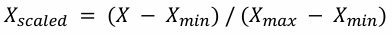

- 모든 데이터의 범위를 0~1 로 변환하는 것 (데이터의 분포를 유지하면서 데이터를 특정 범위로 축소시키는 데에 유용)

In [41]:
minmax_df = origin.copy()

x = minmax_df['필기점수']
xmin = x.min()
xmax = x.max()

minmax_df['필기점수_MinMax(1)'] = (x-xmin) / (xmax - xmin)
minmax_df.head()


,이름,성별,필기점수,학부성적,병원경력,합격여부,필기점수_MinMax(1)
접수코드,,,,,,,
NRS0001,장은우,남,380,3.61,3,불합격,0.275862
NRS0002,최지호,남,660,3.67,3,합격,0.758621
NRS0003,김하준,남,800,4.00,1,합격,1.000000
NRS0004,임아윤,여,640,3.19,4,합격,0.724138
NRS0005,강하준,남,520,2.93,4,불합격,0.517241


In [42]:
#Sklearn 활용 , 특정 필드만 추출
x = minmax_df[['필기점수']]
x.head()

,필기점수
접수코드,
NRS0001,380
NRS0002,660
NRS0003,800
NRS0004,640
NRS0005,520


In [43]:
#스케일링 적용
scaler = MinMaxScaler()
minmax_df['필기점수_MinMax(2)'] = scaler.fit_transform(x)
minmax_df.head()

,이름,성별,필기점수,학부성적,병원경력,합격여부,필기점수_MinMax(1),필기점수_MinMax(2)
접수코드,,,,,,,,
NRS0001,장은우,남,380,3.61,3,불합격,0.275862,0.275862
NRS0002,최지호,남,660,3.67,3,합격,0.758621,0.758621
NRS0003,김하준,남,800,4.00,1,합격,1.000000,1.000000
NRS0004,임아윤,여,640,3.19,4,합격,0.724138,0.724138
NRS0005,강하준,남,520,2.93,4,불합격,0.517241,0.517241


Max-Abs Scaler

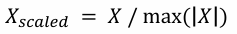

- 절대값 기준으로 -1~1 범위로 스케일링
    - 음수/양수 모두 유지, 희소 행렬(sparse matrix)에 유리


In [44]:
abs_df = origin.copy()
x = abs_df['필기점수']
abs_df['필기점수_MaxAbs(1)'] = x / x.abs().max()
abs_df.head()

,이름,성별,필기점수,학부성적,병원경력,합격여부,필기점수_MaxAbs(1)
접수코드,,,,,,,
NRS0001,장은우,남,380,3.61,3,불합격,0.475
NRS0002,최지호,남,660,3.67,3,합격,0.825
NRS0003,김하준,남,800,4.00,1,합격,1.000
NRS0004,임아윤,여,640,3.19,4,합격,0.800
NRS0005,강하준,남,520,2.93,4,불합격,0.650


In [45]:
#Sklearn 활용
scaler = MaxAbsScaler()
x = abs_df[['필기점수']]
abs_df['필기점수_MaxAbs(2)'] = scaler.fit_transform(x)
abs_df.head()

,이름,성별,필기점수,학부성적,병원경력,합격여부,필기점수_MaxAbs(1),필기점수_MaxAbs(2)
접수코드,,,,,,,,
NRS0001,장은우,남,380,3.61,3,불합격,0.475,0.475
NRS0002,최지호,남,660,3.67,3,합격,0.825,0.825
NRS0003,김하준,남,800,4.00,1,합격,1.000,1.000
NRS0004,임아윤,여,640,3.19,4,합격,0.800,0.800
NRS0005,강하준,남,520,2.93,4,불합격,0.650,0.650


StandardScaler (z-score, 표준화)

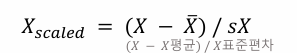

- 데이터를 평균이 0, 표준편차가 1인 표준정규분포를 따르도록 변환
    - 데이터를 정규분포에 근사시켜서 이상치에 덜 민감하게 만들어준다.

In [46]:
std_df = origin.copy()
x = origin['학부성적']
std_df['학부성적_Standard(1)'] = (x - x.mean()) / x.std()
std_df.head()

,이름,성별,필기점수,학부성적,병원경력,합격여부,학부성적_Standard(1)
접수코드,,,,,,,
NRS0001,장은우,남,380,3.61,3,불합격,0.578348
NRS0002,최지호,남,660,3.67,3,합격,0.736008
NRS0003,김하준,남,800,4.00,1,합격,1.603135
NRS0004,임아윤,여,640,3.19,4,합격,-0.525269
NRS0005,강하준,남,520,2.93,4,불합격,-1.208461


RobustScaler

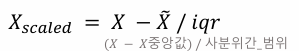

- 이상치가 존재할 경우 이상치의 영향을 최소화하여 데이터를 스케일링하는 방법
    - 이상치가 포함된 데이터를 표준화, 정규화할 때 이상치의 영향으로 전체 데이터의 분포가 왜곡됨
    - RobustScaler는 중앙값, 사분위수를 이용하여 스케일링 함 -> 근데 잘 안쓰긴함..

In [47]:
rb_df = origin.copy()

x = rb_df['병원경력']
m = x.median()
iqr = x.quantile(0.75) - x.quantile(0.25)

rb_df['병원경력_Robust(1)'] = (x - m) / iqr
rb_df.head()

,이름,성별,필기점수,학부성적,병원경력,합격여부,병원경력_Robust(1)
접수코드,,,,,,,
NRS0001,장은우,남,380,3.61,3,불합격,1.0
NRS0002,최지호,남,660,3.67,3,합격,1.0
NRS0003,김하준,남,800,4.00,1,합격,-1.0
NRS0004,임아윤,여,640,3.19,4,합격,2.0
NRS0005,강하준,남,520,2.93,4,불합격,2.0


In [48]:
#Sklearn 활용
scaler = RobustScaler()
x = rb_df[['병원경력']]
rb_df['병원경력_Robust(2)'] = scaler.fit_transform(x)
rb_df.head()

,이름,성별,필기점수,학부성적,병원경력,합격여부,병원경력_Robust(1),병원경력_Robust(2)
접수코드,,,,,,,,
NRS0001,장은우,남,380,3.61,3,불합격,1.0,1.0
NRS0002,최지호,남,660,3.67,3,합격,1.0,1.0
NRS0003,김하준,남,800,4.00,1,합격,-1.0,-1.0
NRS0004,임아윤,여,640,3.19,4,합격,2.0,2.0
NRS0005,강하준,남,520,2.93,4,불합격,2.0,2.0


연습문제

In [49]:
origin = load_data('performance')
origin

[data] https://data.hossam.kr/data/lab05/performance.xlsx
[desc] 직원 성과 지표 데이터

field                 description
--------------------  -----------------
EmployeeID            직원 ID
MonthlySales          월별 매출
CustomerSatisfaction  고객 만족도
ProjectHours          프로젝트 작업시간
InnovationScore       혁신 점수



,MonthlySales,CustomerSatisfaction,ProjectHours,InnovationScore
EmployeeID,,,,
E001,120,75,160,8
E002,250,90,180,9
E003,80,60,150,6
E004,180,82,170,8
E005,300,95,190,10
E006,90,65,155,7
E007,200,88,175,9
E008,110,70,165,7
E009,220,85,185,9


In [50]:
#MonthlySales 컬럼에 Min-Max 스케일링 적용
minmax_df = origin.copy()
scaler = MinMaxScaler()
x = minmax_df[['MonthlySales']]
minmax_df['MonthlySales'] = scaler.fit_transform(x)
minmax_df.head()

,MonthlySales,CustomerSatisfaction,ProjectHours,InnovationScore
EmployeeID,,,,
E001,0.259259,75,160,8
E002,0.740741,90,180,9
E003,0.111111,60,150,6
E004,0.481481,82,170,8
E005,0.925926,95,190,10


In [51]:
MaxAbs_df = minmax_df.copy()
scaler = MaxAbsScaler()
x = MaxAbs_df[['CustomerSatisfaction']]
MaxAbs_df['CustomerSatisfaction'] = scaler.fit_transform(x)
MaxAbs_df.head()

,MonthlySales,CustomerSatisfaction,ProjectHours,InnovationScore
EmployeeID,,,,
E001,0.259259,0.765306,160,8
E002,0.740741,0.918367,180,9
E003,0.111111,0.612245,150,6
E004,0.481481,0.836735,170,8
E005,0.925926,0.969388,190,10


In [52]:
Standard_df = MaxAbs_df.copy()
scaler = StandardScaler()
x = Standard_df[['ProjectHours']]
y = Standard_df[['InnovationScore']]
Standard_df['ProjectHours'] = scaler.fit_transform(x)
Standard_df['InnovationScore'] = scaler.fit_transform(y)
Standard_df.head()

,MonthlySales,CustomerSatisfaction,ProjectHours,InnovationScore
EmployeeID,,,,
E001,0.259259,0.765306,-0.462556,0.066082
E002,0.740741,0.918367,0.738889,0.726900
E003,0.111111,0.612245,-1.063279,-1.255555
E004,0.481481,0.836735,0.138166,0.066082
E005,0.925926,0.969388,1.339611,1.387719


In [53]:
result = Standard_df.copy()
result

,MonthlySales,CustomerSatisfaction,ProjectHours,InnovationScore
EmployeeID,,,,
E001,0.259259,0.765306,-0.462556,0.066082
E002,0.740741,0.918367,0.738889,0.726900
E003,0.111111,0.612245,-1.063279,-1.255555
E004,0.481481,0.836735,0.138166,0.066082
E005,0.925926,0.969388,1.339611,1.387719
E006,0.148148,0.663265,-0.762918,-0.594737
E007,0.555556,0.897959,0.438527,0.726900
E008,0.222222,0.714286,-0.162195,-0.594737
E009,0.629630,0.867347,1.039250,0.726900


In [ ]:
result['Total'] = result['MonthlySales'] + result['CustomerSatisfaction'] + result['ProjectHours'] + result['InnovationScore']
#합산 값이 가장 높은 직원순 
result.sort_values('Total', ascending=False)

,MonthlySales,CustomerSatisfaction,ProjectHours,InnovationScore,Total
EmployeeID,,,,,
E018,1.000000,1.000000,1.639972,1.387719,5.027691
E005,0.925926,0.969388,1.339611,1.387719,4.622644
E012,0.851852,0.938776,1.219467,1.387719,4.397813
E015,0.777778,0.928571,0.919105,0.726900,3.352355
E009,0.629630,0.867347,1.039250,0.726900,3.263127
E002,0.740741,0.918367,0.738889,0.726900,3.124897
E020,0.703704,0.908163,0.618744,0.726900,2.957512
E007,0.555556,0.897959,0.438527,0.726900,2.618943
E014,0.518519,0.816327,0.258311,0.066082,1.659238
